# Exercise 1
## Support Vector Machines
Perception is an important step for autonomous systems. We will look into one method of classifying data given a dataset containing inputs and corresponding targets. In this case we will look at the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), but it could be any arbitrary dataset.

Today we will work with classification using [Support Vector Machines (SVM)](https://en.wikipedia.org/wiki/Support-vector_machine).
We will use the implementation from the `sklearn` library. 

**Note**: If the import of the `pandas` library fails because the module isn't installed, install the `pandas` library with pip.

In [1]:
import sklearn as sk
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

# Helper function for plotting the fit of your SVM.
def plot_fit(X, y, clf):
    """
    X = samples
    y = Ground truth
    clf = trained model
    """
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors= "black")
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

As mentioned previously, we're using the Iris dataset. It consists of 150 samples with 4 featuers each.
We're using the sepal length and the sepal width as features to predict which species of the Iris flower one sample is.
The target classes are integer-encoded.

In [2]:
# Import some data to play with
iris = sk.datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
display(iris_df)
X = iris_df.iloc[:,:2]
display(X)
y = iris.target
print("Number of samples ::", X.shape[0])
print("Number of features ::", X.shape[1])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


Number of samples :: 150
Number of features :: 2


## Pandas
We will use pandas to manage our data.
Initially we will only use the two first data points, i.e. the sepal length and sepal width.

We plot the data and we can see all our samples

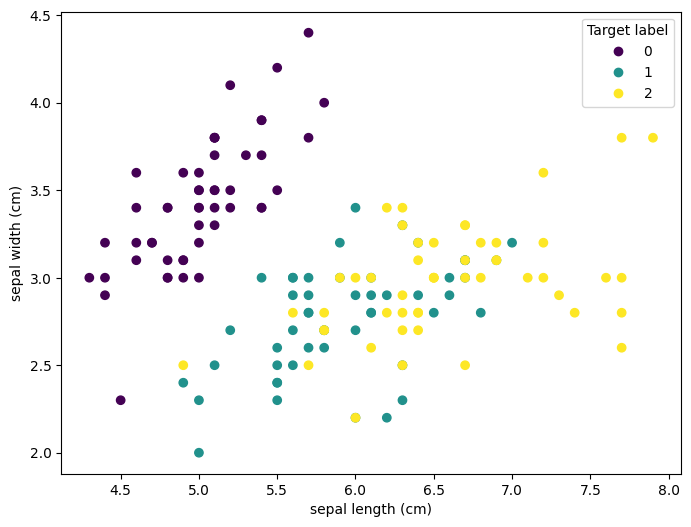

In [3]:
fig1 = plt.figure(1, figsize=(8, 6))
ax = plt.scatter(X['sepal length (cm)'], X["sepal width (cm)"], c=y)
plt.xlabel('sepal length (cm)')
plt.ylabel("sepal width (cm)")
plt.legend(*ax.legend_elements(), title='Target label')
plt.show()

## Normalization.
Using `sklearn.preprocessing` we can normalize the data to have zero mean and unitary variance.
Why could that be important?
```{Python}
X_scaled = StandardScaler().fit_transform(X)
```
Plot the data, did you succed with normalizing the data?



No handles with labels found to put in legend.
No handles with labels found to put in legend.


Original Data Mean:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
dtype: float64
Original Data Std:
 sepal length (cm)    0.828066
sepal width (cm)     0.435866
dtype: float64
Scaled Data Mean:
 [-1.69031455e-15 -1.84297022e-15]
Scaled Data Std:
 [1. 1.]


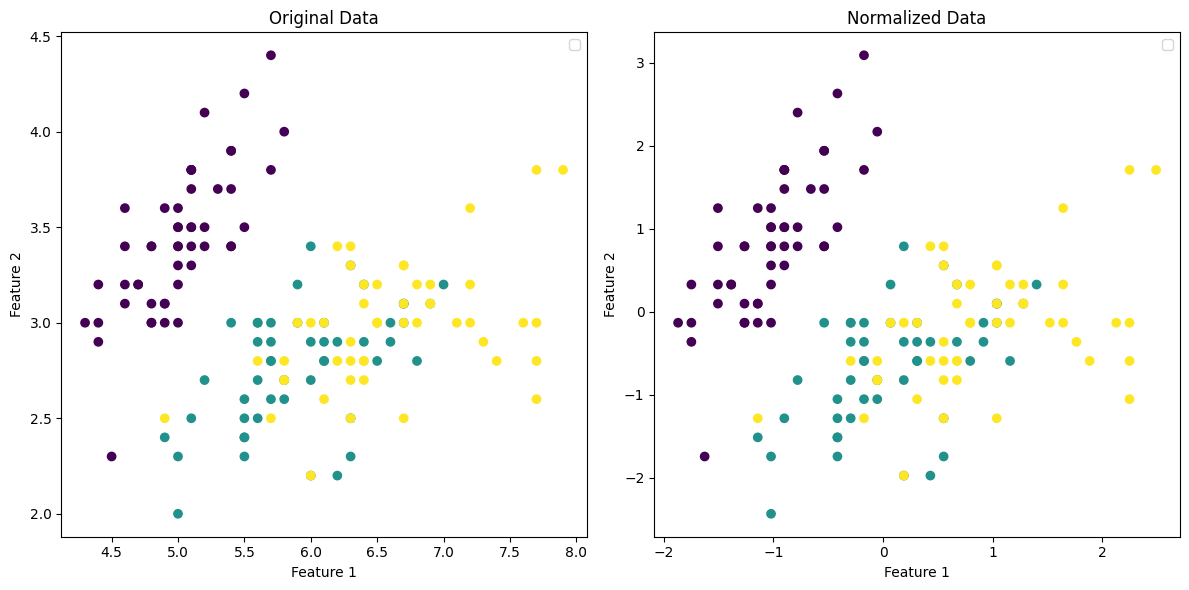

In [4]:
# Normalizing data to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plotting original and scaled data
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Checking mean and standard deviation before and after scaling
print("Original Data Mean:\n", X.mean())
print("Original Data Std:\n", X.std())

print("Scaled Data Mean:\n", X_scaled.mean(axis=0))
print("Scaled Data Std:\n", X_scaled.std(axis=0))

# Plot original data
ax[0].scatter(X['sepal length (cm)'], X["sepal width (cm)"], c=y)
ax[0].set_title("Original Data")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
ax[0].legend()

# Plot scaled data
ax[1].scatter(X_scaled[:,0], X_scaled[:,1], c=y)
ax[1].set_title("Normalized Data")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")
ax[1].legend()

plt.tight_layout()
plt.show()

### Training / testing split.
We now create a training and testing set.
The training set is to train our model and the testing set is to make sure we don't overfit to the data. We can use the test set to analyze this.

You can use the following function to create your training and testing split:
```{Python}
train_test_split(data, target, test_size=n)
```

In [5]:

data = X  # The dataset with features
target = y  # The target labels

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Optionally, check the shapes of the training and testing sets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (120, 2)
Testing data shape: (30, 2)


## Train and test the accuracy of your model
Using `LinearSVC` from `sklearn`:
```{Python}
sk.svm.LinearSVC(penalty='l2', loss='squared_hinge', random_state=0, max_iter=10e4)
```
[Documentation for LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=linearsvc#sklearn.svm.LinearSVC)

You can test the accuracy of your trained model with:
```{}
clf.score(X_train, y_train)
clf.score(X_test, y_test)
```

And finally, plot your fit with the provided plot function `plot_fit`

In [ ]:
# Create a LinearSVC model
#clf = sk.svm.SVC(kernel='linear', C=1)
#clf = sk.svm.SVC(kernel='rbf', gamma=1, C=10)
clf = sk.svm.SVC(kernel='poly', degree=1, C=10)


#clf = sk.svm.LinearSVC(penalty='l2', loss='squared_hinge', random_state=0, max_iter=int(10e4))

# Fit the model on the training data
clf.fit(X_train, y_train)

# Test accuracy on the training and testing sets
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Training accuracy: {train_accuracy}")
print(f"Testing accuracy: {test_accuracy}")

Training accuracy: 0.775
Testing accuracy: 0.8333333333333334


c:\Users\oem\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


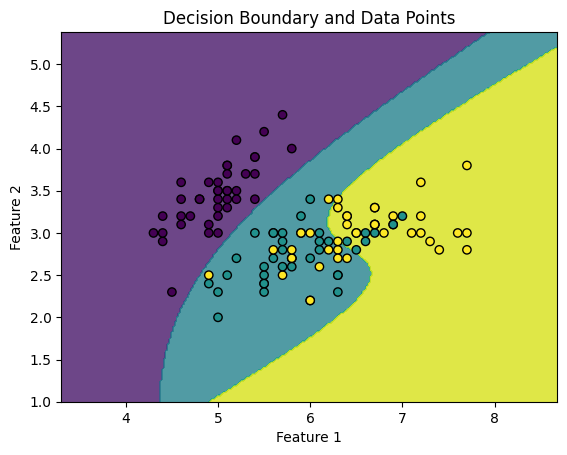

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fit(X_train, y_train, clf):
    """
    Plots the decision boundary and the data points.
    
    Parameters:
    X_train: The training data.
    y_train: The labels for the training data.
    clf: The trained classifier.
    """
    # Create a mesh grid for plotting the decision boundary
    h = .02  # Step size in the mesh
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on the mesh grid points
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='k', marker='o')
    plt.title("Decision Boundary and Data Points")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Call the plot_fit function to visualize the fit
plot_fit(X_train, y_train, clf)


## What did we do?
The classifier took the training data and learned how to classify the points based on their features.

## Exercises
### 1) Kernel
First exersice is to try other kernels than the linear:
```{python}
svc = svm.SVC(kernel='linear', C=C)
rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C))
poly_svc = svm.SVC(kernel='poly', degree=degree, C=C))
```
[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

Do you get better results?
### 2 ) More dimensions
Now use 3 features for each sample. So either you add the petal length or petal width as an additional feature.

Can you get a better fit?

Can you visualize your predictions? 
Make a 3D scatterplot with colors for each predicted class.
```{Python}
fig = plt.figure(1, figsize=(10, 8))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(x, y, z, c=class_vector)
```

### 3) Even more dimensions
Finally try fitting the classifier with all features, i.e. 4 features per sample.

1. Linear Kernel SVC:

svc = svm.SVC(kernel='linear', C=C)

    Kernel: linear
        The linear kernel is the simplest kernel, where the decision boundary is a straight line (or hyperplane in higher dimensions). It is used when the data is linearly separable, meaning that a straight line can separate the different classes in the feature space.
        This is particularly useful for problems where the classes are already separable without needing more complex decision boundaries.
    C: Regularization parameter
        The C parameter controls the trade-off between achieving a low error on the training set and maintaining a simpler model that generalizes well.
        A high value of C puts more emphasis on correctly classifying every training point (low bias, high variance), possibly leading to overfitting.
        A low value of C allows the model to tolerate some misclassification (high bias, low variance), which helps in generalizing better to unseen data.

2. RBF Kernel SVC (Radial Basis Function Kernel):

rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C)

    Kernel: rbf (Radial Basis Function)
        The RBF kernel is a popular choice when the data is not linearly separable. It transforms the data into a higher-dimensional space where a linear decision boundary can be used.
        The RBF kernel calculates the similarity between data points. It maps the input features into an infinite-dimensional space, which makes it flexible and capable of handling complex decision boundaries.
        RBF is ideal for problems where the data classes are not linearly separable.
    Gamma:
        The gamma parameter defines how far the influence of a single training point reaches.
            A high value of gamma means that each training point only influences a small region around it, which leads to a highly flexible and complex decision boundary (more prone to overfitting).
            A low value of gamma means that each training point has a broader influence, leading to a smoother decision boundary (potentially underfitting).
    C: Regularization parameter
        Just like in the linear kernel, C controls the trade-off between the model's bias and variance.
        High C values result in a model that tries to classify every point correctly, even if it means creating a more complex and possibly overfitting decision boundary.
        Low C values lead to a simpler decision boundary, which might generalize better.

3. Polynomial Kernel SVC:

poly_svc = svm.SVC(kernel='poly', degree=degree, C=C)

    Kernel: poly (Polynomial Kernel)
        The polynomial kernel is another method of transforming the data into a higher-dimensional space, but instead of using an RBF function, it uses polynomial functions.
        It calculates the similarity between data points using polynomials (e.g., quadratic or cubic). This kernel is often used when there are more complex relationships between the data points.
        Polynomial kernels can be useful for capturing relationships that are more complex than those that can be represented by a linear boundary.
    Degree:
        The degree parameter specifies the degree of the polynomial. For example:
            A degree of 2 would give you quadratic decision boundaries (curves).
            A degree of 3 would result in cubic decision boundaries.
        Higher degree values lead to more complex decision boundaries but may also result in overfitting if the degree is too high.
    C: Regularization parameter
        Just like with the other kernels, C controls the trade-off between bias and variance. A low C allows for a simpler, more generalizable model, while a high C creates a model that closely fits the training data but may not generalize well to new, unseen data.

Summary:

    Linear kernel: Used when data is linearly separable, results in a straight decision boundary.
    RBF kernel: Used when data is non-linearly separable, creates complex decision boundaries by mapping data to higher dimensions.
    Polynomial kernel: Like RBF, but based on polynomial functions, allowing more flexibility and higher complexity than a linear kernel.

Hyperparameters:

    C: Regularization parameter controlling the trade-off between bias and variance.
    gamma (for RBF kernel): Determines the influence of a single data point on the decision boundary.
    degree (for polynomial kernel): Determines the degree of the polynomial used for the decision boundary.

The choice of kernel and hyperparameters (like gamma, degree, and C) depends on the nature of the data and the complexity of the decision boundaries needed.